In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def initialize_membership_matrix(n_samples, n_clusters):
    U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)
    return U

def calculate_centroids(U, X, m):
    num = np.dot(U.T**m, X)
    den = np.sum(U.T**m, axis=1).reshape(-1, 1)
    return num / den

def update_membership_matrix(X, centroids, m):
    n = X.shape[0]
    c = centroids.shape[0]
    U_new = np.zeros((n, c))
    for i in range(n):
        for j in range(c):
            denom = sum((np.linalg.norm(X[i] - centroids[j]) /
                         np.linalg.norm(X[i] - centroids[k])) ** (2 / (m - 1))
                        for k in range(c))
            U_new[i][j] = 1 / denom
    return U_new

def fuzzy_k_means(X, n_clusters=3, m=2, max_iter=100, epsilon=1e-5):
    U = initialize_membership_matrix(len(X), n_clusters)
    for iteration in range(max_iter):
        centroids = calculate_centroids(U, X, m)
        U_new = update_membership_matrix(X, centroids, m)
        if np.linalg.norm(U_new - U) < epsilon:
            break
        U = U_new
    return centroids, U

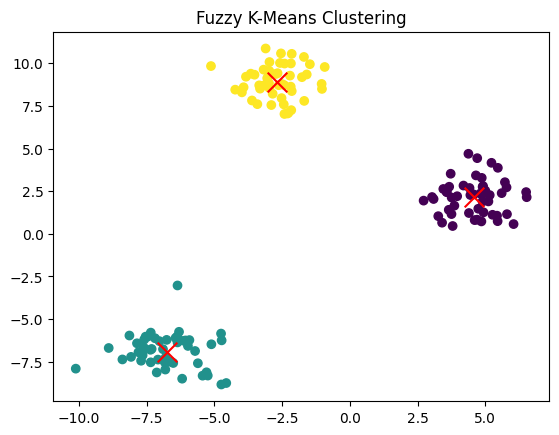

In [3]:

# Buat data dummy
X, y = make_blobs(n_samples=150, centers=3, n_features=2, random_state=42)

# Jalankan fuzzy k-means
centroids, U = fuzzy_k_means(X, n_clusters=3, m=2)

# Plot hasil
cluster_labels = np.argmax(U, axis=1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.title("Fuzzy K-Means Clustering")
plt.show()
